In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("titanic_dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data['Age']=data['Age'].fillna(data['Age'].median())
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [5]:
data.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
#dealing categorical data
data['Sex']=data['Sex'].replace(['male','female'],[0,1])
data['Embarked']=data['Embarked'].replace(['S','C','Q'],[0,1,2])

In [7]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,B96 B98,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,B96 B98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,B96 B98,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,B96 B98,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1


In [8]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object

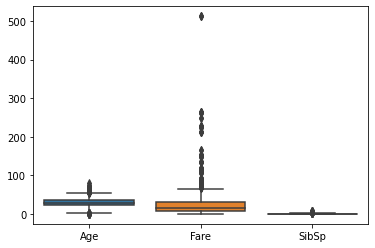

In [9]:
#Handling outliers
sns.boxplot(data=data[['Age', 'Fare','SibSp']])
plt.show()

In [10]:
#IQR calculation
import warnings
warnings.filterwarnings("ignore")
Q1=data.quantile(.25)
Q3=data.quantile(.75)
IQR=Q3-Q1

In [11]:
for i in ['Age', 'SibSp','Fare']:
         Q1=np.percentile(data[i],25,interpolation='midpoint')
         Q2=np.percentile(data[i],50,interpolation='midpoint')
         Q3=np.percentile(data[i],75,interpolation='midpoint')
         print(Q1,Q2,Q3)

22.0 28.0 35.0
0.0 0.0 1.0
7.9104 14.4542 31.0


In [12]:
#lower limit and upper limit
    
IQR=Q3-Q1
ll=Q1-1.5*IQR
ul=Q3+1.5*IQR


 #Identifying outlier values
outliers=[]
for x in data[i]:
    if (x>ul)or(x<ll):
        outliers.append(x)
ind=data[i]>ul
i=data.loc[ind].index
data.drop(i,inplace=True)

In [13]:
#Dropping some columns
data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
5,0,3,0,28.0,0,0,8.4583,2


In [14]:
#splitting into test and training data
Y=data.Survived
X=data
X.drop(['Survived'],axis=1,inplace=True)

In [15]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,775.00000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,2.48000,0.314839,28.748710,0.437419,0.340645,17.822091,0.343226
std,0.73439,0.464752,12.782123,0.899838,0.785914,13.578085,0.647697
min,1.00000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,3.00000,0.000000,28.000000,0.000000,0.000000,13.000000,0.000000
75%,3.00000,1.000000,34.000000,1.000000,0.000000,26.000000,0.000000
max,3.00000,1.000000,80.000000,5.000000,6.000000,65.000000,2.000000


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.3)

In [17]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [18]:
#Naive-Bayes Classifier
from sklearn.naive_bayes import GaussianNB
classifer = GaussianNB()
classifer.fit(X_train,Y_train)
y_pred = classifer.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
acc_score = accuracy_score(Y_test,y_pred)
print("Accuracy is =", acc_score)

Accuracy is = 0.7381974248927039


In [19]:
#Hyper tuning
# fitting Bernoulli Naive Bayes to training set

from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train,Y_train)
cm = confusion_matrix(Y_test,y_pred)
y_pred = classifier.predict(X_test)
accuracy_score(Y_test,y_pred)

0.7725321888412017

After hyper tuning accuracy is imprived as 77% for Naive Bayes Classifier